In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [3]:
cancer = pd.read_csv('cancer.csv')
cancer.head() 
N=len(cancer)
N

569

In [4]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
cancer.replace({'M': 1, 'B': 0}, inplace=True)
cancer_reg = cancer[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
data_cancer=cancer_reg[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

train_cancer, eval_cancer = train_test_split(data_cancer, test_size=0.2, random_state=43)

In [6]:
def standardize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_std = (X - mu) / sigma
    return X_std

In [7]:
XCt=train_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
XCt=standardize(XCt)
XCe=eval_cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
XCe=standardize(XCe)

In [8]:
YCt = train_cancer[['diagnosis']]
YCt=YCt.values
YCe = eval_cancer[['diagnosis']]
YCe=YCe.values

In [124]:
def accuracy(y, y_predicted):
    return np.mean(y == y_predicted)

def precision(y, y_predicted):
    true_positive = np.sum((y == 1) & (y_predicted == 1))
    predicted_positive = np.sum(y_predicted == 1)
    return true_positive / predicted_positive if predicted_positive != 0 else 0

def recall(y, y_predicted):
    true_positive = np.sum((y == 1) & (y_predicted == 1))
    actual_positive = np.sum(y == 1)
    return true_positive / actual_positive if actual_positive != 0 else 0

def apply_pca(x, k):
    pca = PCA(n_components=k)
    return pca.fit_transform(x), pca

def generate_k_values(max_value):
    return list(range(1, max_value + 1))

def train_k_values(x_train, y_train, x_eval, y_eval, k_values, kernels):
    results = {}
    y_eval = np.ravel(y_eval)

    for kernel in kernels:
        best_k = None
        best_accuracy = 0
        best_precision = 0
        best_recall = 0
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
    
        for k in k_values:
            x_pca_train, pca = apply_pca(x_train, k)
            x_pca_eval = pca.transform(x_eval)
            svm = SVC(kernel=kernel)
            svm.fit(x_pca_train, y_train.ravel())
            y_pred = svm.predict(x_pca_eval)
            acc = accuracy(y_eval, y_pred)
            prec = precision(y_eval, y_pred)
            rec = recall(y_eval, y_pred)
            accuracy_scores.append(acc)
            precision_scores.append(prec)
            recall_scores.append(rec)
            
            if acc > best_accuracy:
                best_accuracy = acc
                best_k = k
            if prec > best_precision:
                best_precision = prec
            if rec > best_recall:
                best_recall = rec
                
        plt.plot(range(len(accuracy_scores)), accuracy_scores, marker='o', linestyle='-', color='b')
        plt.xlabel('K Value')
        plt.ylabel('Accuracy Score')
        plt.title(kernel)
        plt.grid(True)
        plt.show()
        print(best_accuracy)

        plt.plot(range(len(precision_scores)), precision_scores, marker='o', linestyle='-', color='g')
        plt.xlabel('K Value')
        plt.ylabel('precision_score')
        plt.title(kernel)
        plt.grid(True)
        plt.show()
        print(best_precision)

        plt.plot(range(len(recall_scores)), recall_scores, marker='o', linestyle='-', color='r')
        plt.xlabel('K Value')
        plt.ylabel('recall_scores')
        plt.title(kernel)
        plt.grid(True)
        plt.show()
        print(best_recall)

    results[kernel] = {
            'best_k': best_k,
            'best_accuracy': best_accuracy,
            'accuracy_scores': np.array(accuracy_scores),
            'precision_scores': np.array(precision_scores),
            'recall_scores': np.array(recall_scores)
    }
    return results


In [126]:
k_values = generate_k_values(XCt.shape[1])

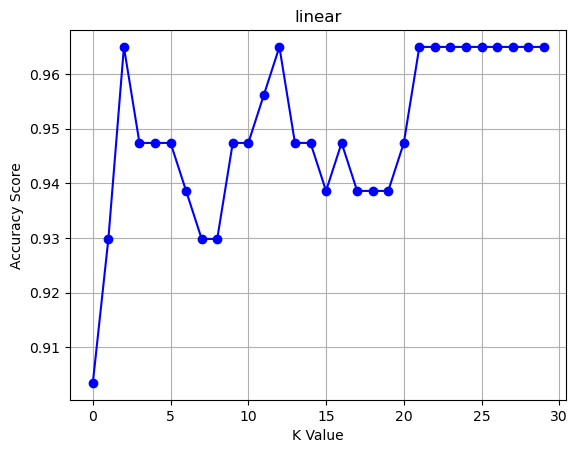

0.9649122807017544


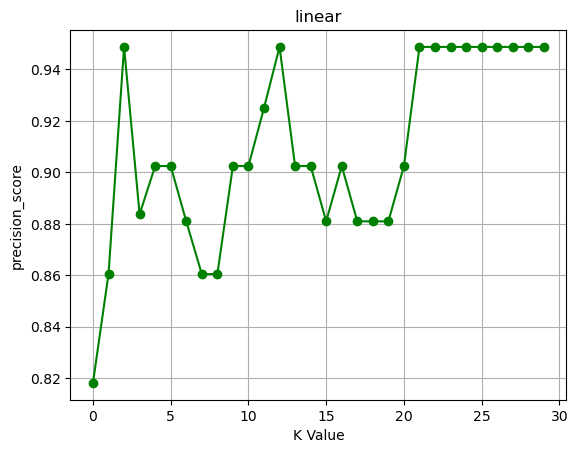

0.9487179487179487


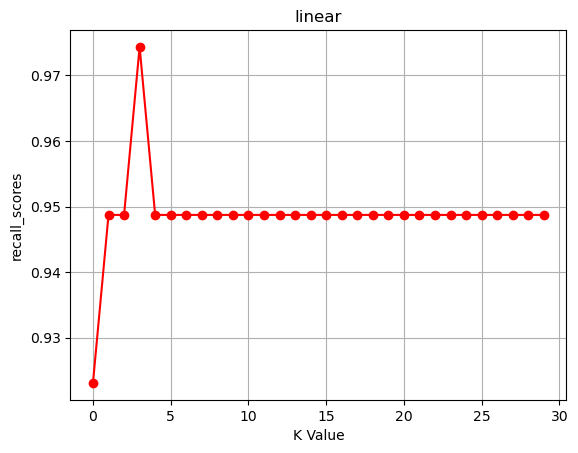

0.9743589743589743


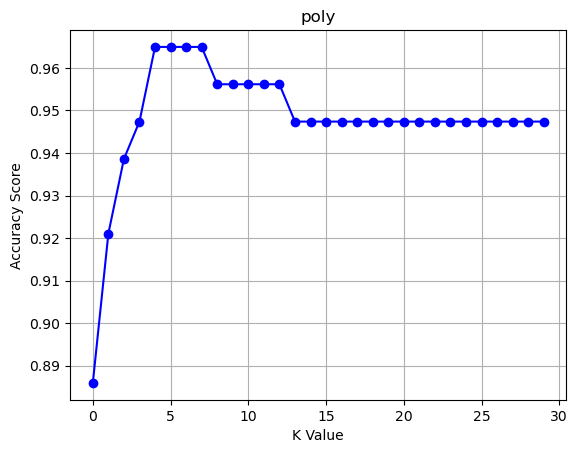

0.9649122807017544


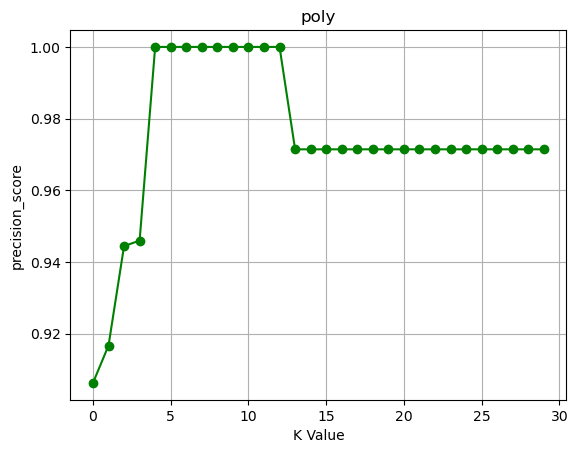

1.0


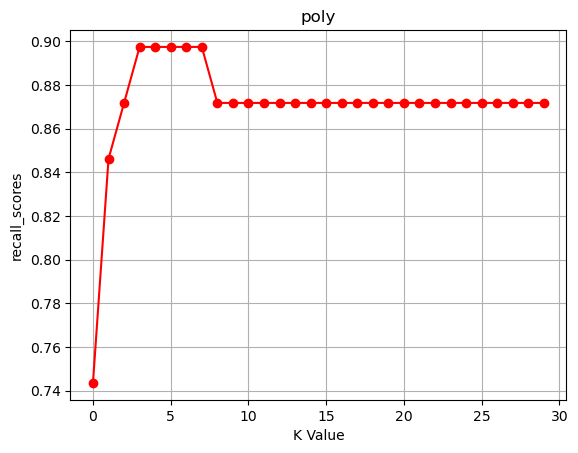

0.8974358974358975


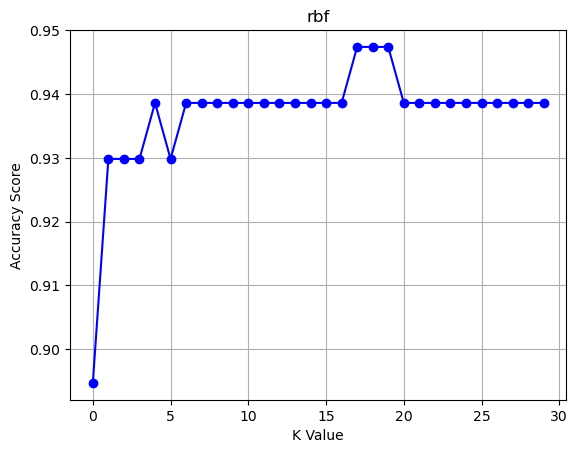

0.9473684210526315


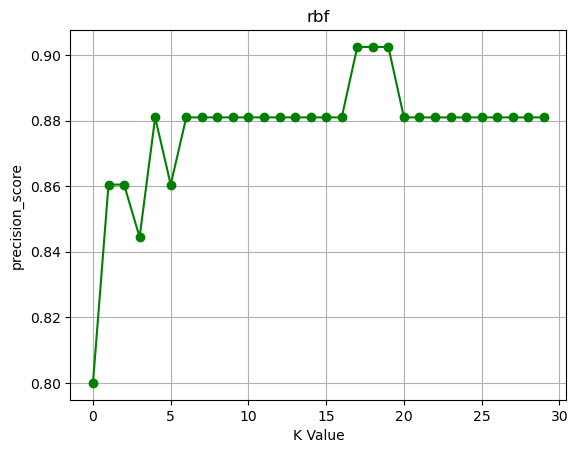

0.9024390243902439


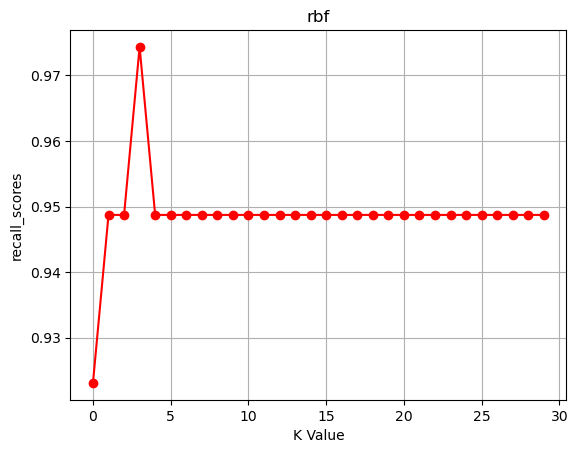

0.9743589743589743


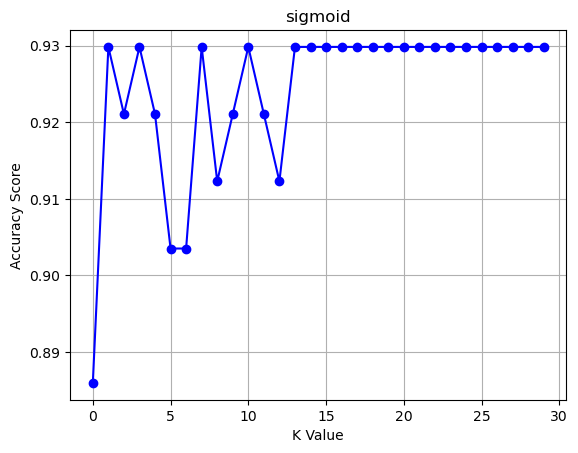

0.9298245614035088


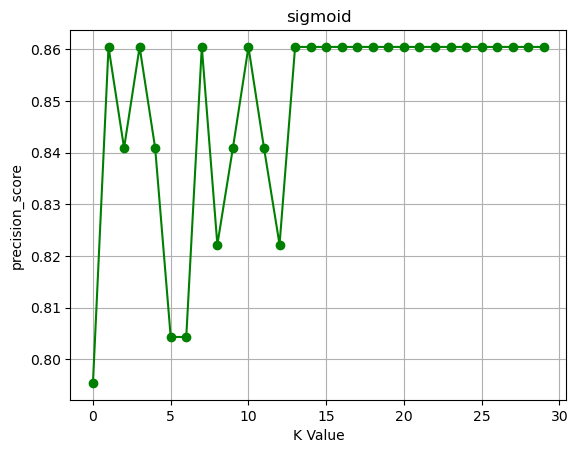

0.8604651162790697


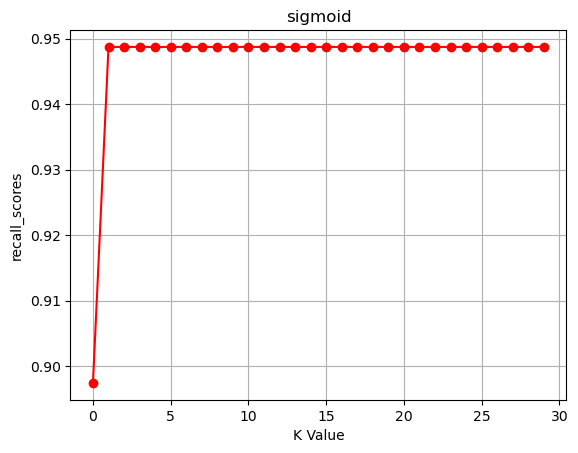

0.9487179487179487


In [128]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = train_k_values(XCt, YCt, XCe, YCe, k_values, kernels)